In [1]:
import sys
from train_options import TrainOptions
from data_loader import CreateDataLoader
import numpy as np
from face_landmark_detection import get_dlib_keypoints
import os
import torch
dataset_root = 'datasets/face/'
sys.argv = ('train.py --name edge2face_512 \
 --dataroot ' + dataset_root +' --dataset_mode face \
 --input_nc 15 --loadSize 512 --num_D 3 \
 --niter 20 --niter_decay 20 --n_frames_total 1').split()
opt = TrainOptions().parse()


------------ Options -------------
TTUR: False
add_face_disc: False
basic_point_only: False
batchSize: 1
beta1: 0.5
checkpoints_dir: ./checkpoints
continue_train: False
dataroot: datasets/face/
dataset_mode: face
debug: False
densepose_only: False
display_freq: 100
display_id: 0
display_winsize: 512
feat_num: 3
fg: False
fg_labels: [26]
fineSize: 512
fp16: False
gan_mode: ls
gpu_ids: [0]
input_nc: 15
isTrain: True
label_feat: False
label_nc: 0
lambda_F: 10.0
lambda_T: 10.0
lambda_feat: 10.0
loadSize: 512
load_features: False
load_pretrain: 
local_rank: 0
lr: 0.0002
max_dataset_size: inf
max_frames_backpropagate: 1
max_frames_per_gpu: 1
max_t_step: 1
model: vid2vid
nThreads: 2
n_blocks: 9
n_blocks_local: 3
n_downsample_E: 3
n_downsample_G: 3
n_frames_D: 3
n_frames_G: 3
n_frames_total: 1
n_gpus_gen: 1
n_layers_D: 3
n_local_enhancers: 1
n_scales_spatial: 1
n_scales_temporal: 2
name: edge2face_512
ndf: 64
nef: 32
netE: simple
netG: composite
ngf: 128
niter: 20
niter_decay: 20
niter_fix_glo

In [2]:
get_dlib_keypoints(dataset_root)

Processing video: datasets/face/train_img/0001
Processing video: datasets/face/train_img/0002


In [3]:
data_loader = CreateDataLoader(opt)
dataset = data_loader.load_data()
dataset_size = len(data_loader)    
print('#training videos = %d' % dataset_size)

CustomDatasetDataLoader
dataset [FaceDataset] was created
#training videos = 2


In [4]:
len(data_loader.dataset.A_paths), len(data_loader.dataset.A_paths[0])

(2, 30)

In [5]:
data_loader.opt.dataroot

'datasets/face/'

In [ ]:
for item in data_loader.dataset:
    item_a_path = item['A_path']
    item_fn = item_a_path.split('/')[-1][:-4]
    semantics_save_path = '/'.join(item_a_path.split('/')[:-1]+['semantics'])
    if not os.path.isdir(semantics_save_path):
        os.makedirs(semantics_save_path)
    torch.save(item['inst'], semantics_save_path + '/'+item_fn+'_inst.pt')
    torch.save(item['A'][0], semantics_save_path + '/'+item_fn+'_canny.pt')    
    
#     print('<<---->>', item['A_path'])

In [21]:
item.keys()

dict_keys(['A', 'B', 'inst', 'A_path', 'change_seq'])

In [22]:
item['A'].shape

torch.Size([45, 512, 512])

In [23]:
item['B'].shape

torch.Size([9, 512, 512])

In [24]:
item['inst'].shape

torch.Size([3, 512, 512])

In [25]:
item['A_path']

'datasets/face/train_keypoints/0003/00028.txt'

In [26]:
item['change_seq']

False

In [27]:
import matplotlib.pyplot as plt

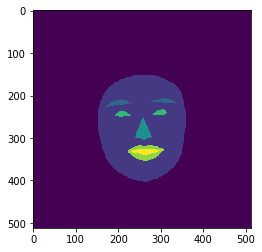

In [56]:
plt.imshow(item['inst'][0])

In [29]:
vv = item['inst'][1]

In [30]:
vv.dtype

torch.float32

In [31]:
np.unique(vv.numpy())

array([0., 1., 2., 3., 4., 5., 6.], dtype=float32)

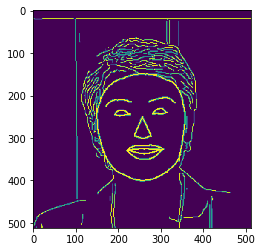

In [57]:
plt.imshow(item['A'][0])

In [33]:
np.unique(item['A'][0]).shape

(256,)

In [34]:
item['A'][0].dtype

torch.float32

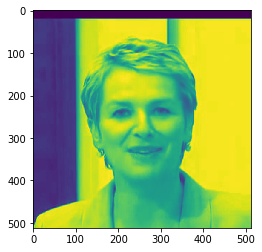

In [35]:
plt.imshow(item['B'][0])